In [41]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
import pickle
%matplotlib inline

In [2]:
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

# Topics number dependency

In [87]:
def investigate(pickle_path, value='ums', fst_y_axis_name='Uniqueness measure', picture_path=None):
    with open(pickle_path, 'r') as f:
        d = pickle.load(f)

    def m_plot(val_name, err_name, normalize=False):
        val = np.array(d[val_name])
        err = np.array(d[err_name])

        if normalize:
            norm = np.max(val)
            val /= norm
            err /= norm

        plt.plot(d['topics_values'], val)
        plt.fill_between(d['topics_values'], val - err, val + err, alpha=0.5, facecolor='yellow')
        
    def m_plot2(val_name):
        val = np.array(d[val_name])
        s = int(0.3 * (len(val) - 1))
        algo = LinearRegression().fit([[x] for x in d['topics_values'][s:]], val[s:])
        plt.plot(d['topics_values'], algo.predict([[x] for x in d['topics_values']]))

    plt.figure(figsize=(12, 10))

    plt.subplot(211)
    plt.xlabel('Topics number')
    plt.ylabel(fst_y_axis_name)

    m_plot('avg_{}_values'.format(value), 'avg_{}_values_err'.format(value))
    m_plot('max_{}_values'.format(value), 'max_{}_values_err'.format(value))
    m_plot('min_{}_values'.format(value), 'min_{}_values_err'.format(value))
    m_plot2('avg_{}_values'.format(value))

    plt.legend(['avg', 'max', 'min'], loc='lower right')
    plt.grid()

    plt.subplot(212)
    plt.xlabel('Topics number')
    plt.ylabel('Peplexity')

    m_plot('train_perplexity_values', 'train_perplexity_values_err')
    m_plot('test_perplexity_values', 'test_perplexity_values_err')

    plt.legend(['train', 'test'], loc='lower right')
    plt.grid()
    
    if picture_path is not None:
        plt.savefig(picture_path, format='eps')

    plt.show()

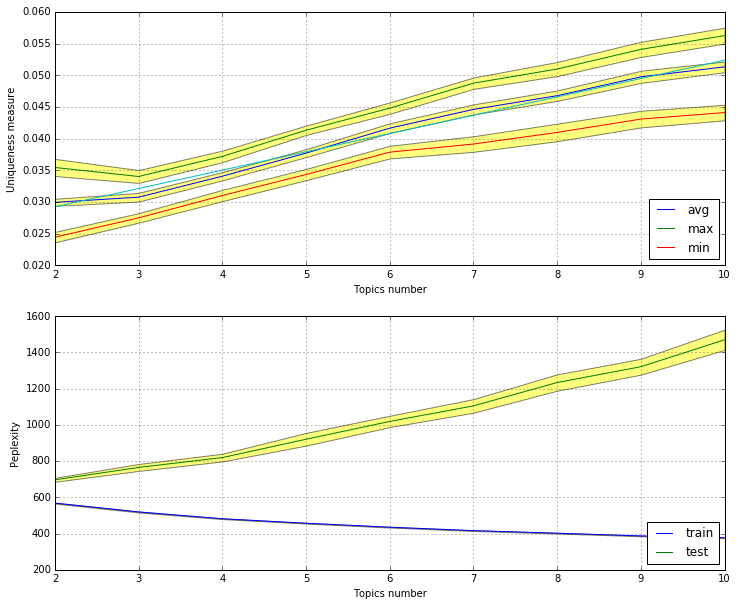

In [88]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_1.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_1_ums.eps'
)

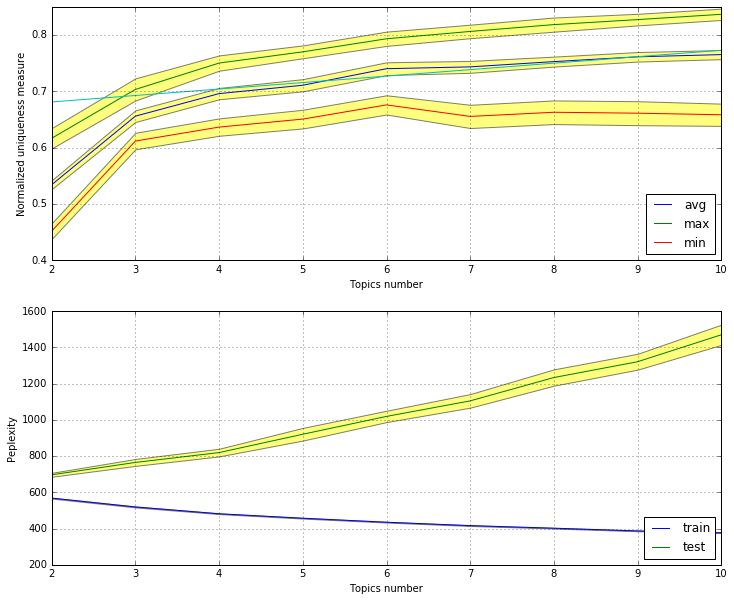

In [89]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_1.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_1_nums.eps'
)

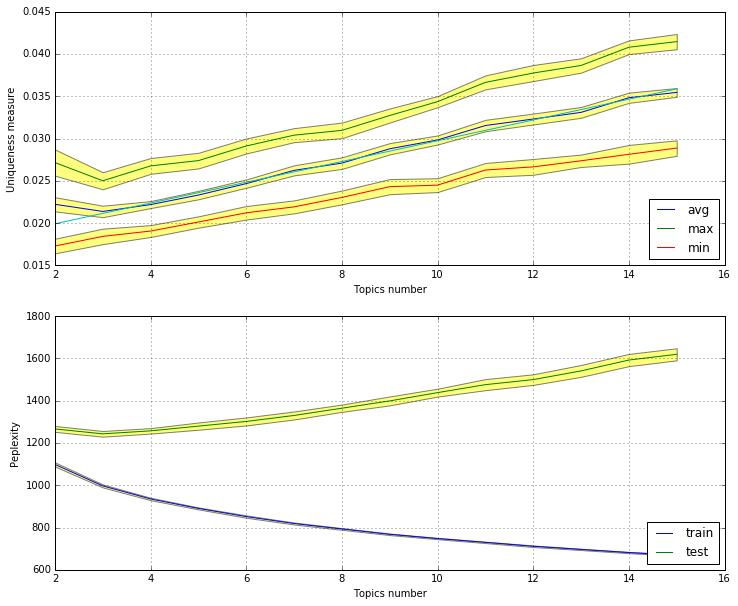

In [90]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_2.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_2_ums.eps'
)

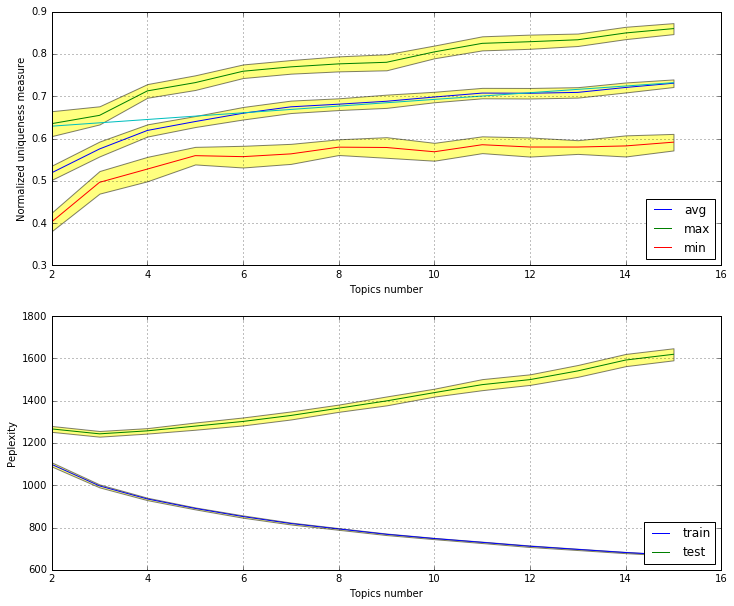

In [91]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_2.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_2_nums.eps'
)

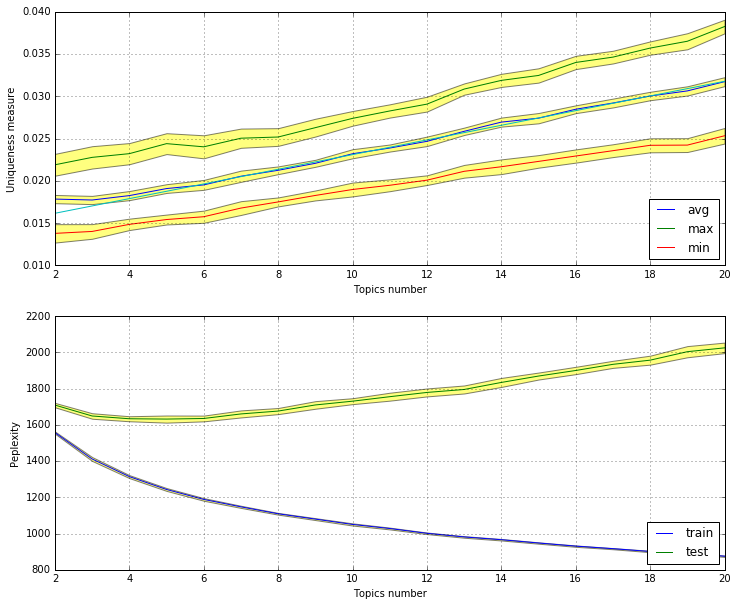

In [92]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_3.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_3_ums.eps'
)

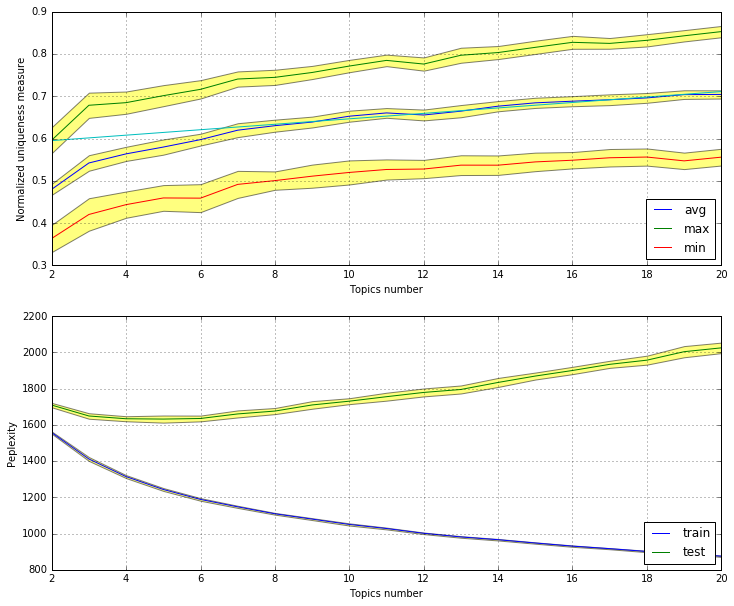

In [93]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_3.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_3_nums.eps'
)

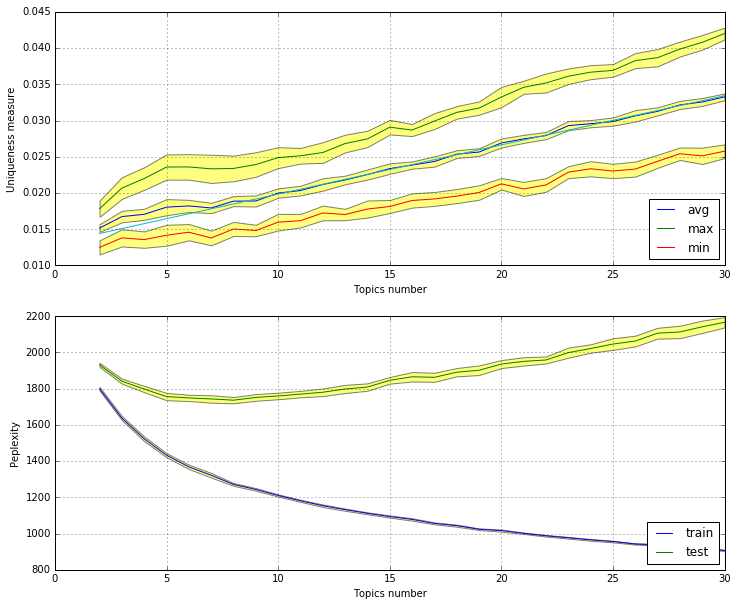

In [94]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_4.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_4_ums.eps'
)

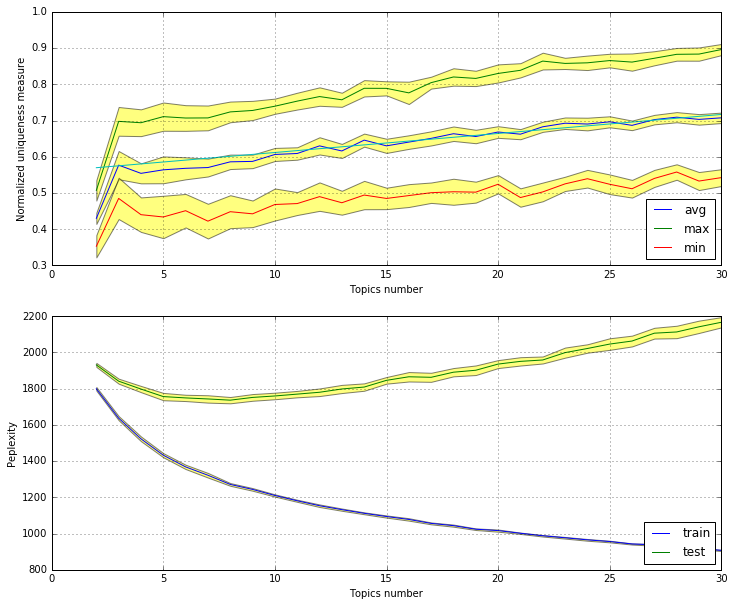

In [95]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_4.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_4_nums.eps'
)

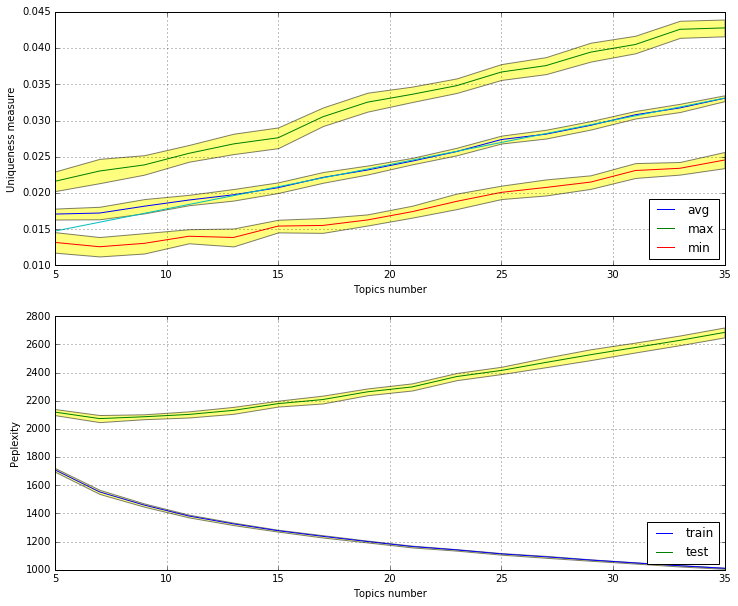

In [96]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_big.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_big_ums.eps'
)

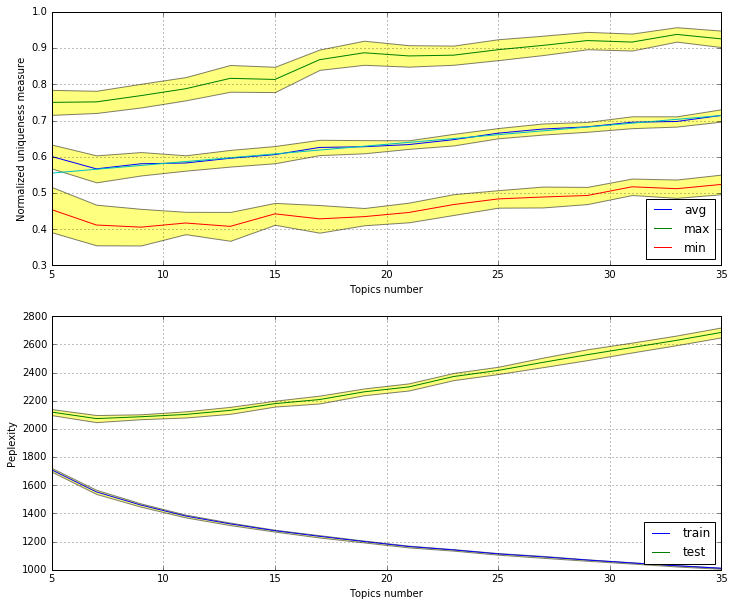

In [97]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_big.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_big_nums.eps'
)

# Sparsity dependency

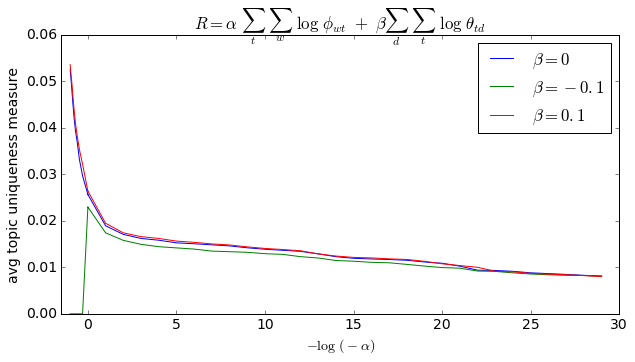

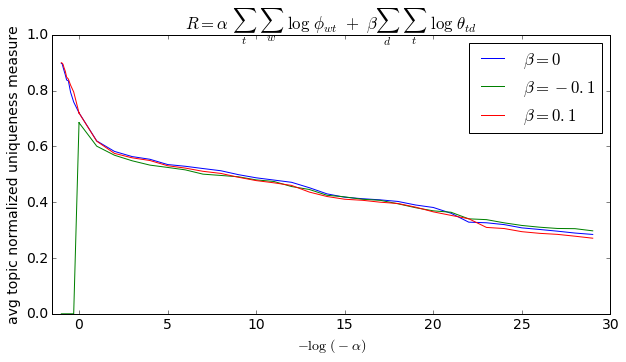

In [14]:
with open('uniqueness_perp/alpha_dependency_3.pkl', 'r') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic uniqueness measure')
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_3_ums.eps', format='eps')
plt.show()


plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic normalized uniqueness measure')
plt.ylim(0, 1)
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_3_nums.eps', format='eps')
plt.show()

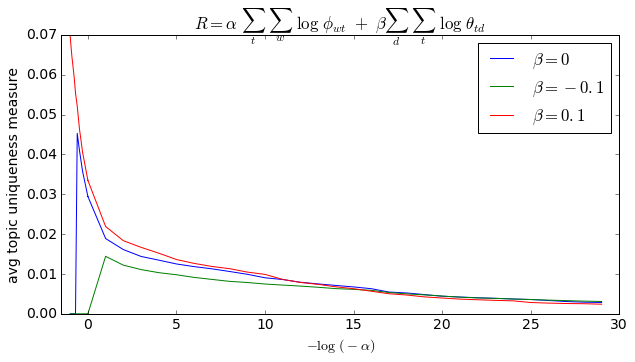

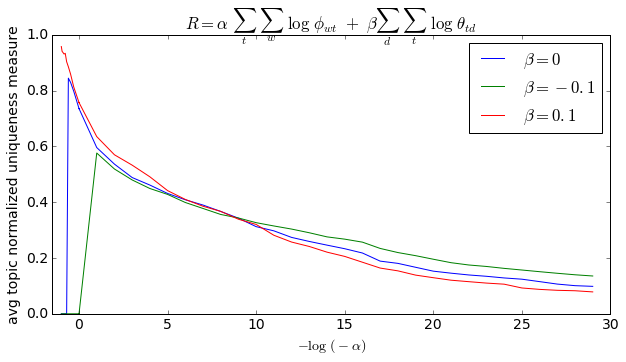

In [15]:
with open('uniqueness_perp/alpha_dependency_7.pkl', 'r') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic uniqueness measure')
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_7_ums.eps', format='eps')
plt.show()


plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic normalized uniqueness measure')
plt.ylim(0, 1)
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_7_nums.eps', format='eps')
plt.show()

# Check uniqueness

In [16]:
def plot_tsne(phis, colors, perplexity, picture_path=None):
    font = {'family' : 'normal',
        'size'   : 18}
    plt.rc('font', **font)

    model = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X = model.fit_transform(phis) 
    plt.figure(figsize=(10, 8))
    plt.xlim(0.95 * min(X[:, 0]), 1.05 * max(X[:, 0]))
    plt.ylim(0.95 * min(X[:, 1]), 1.05 * max(X[:, 1]))
    size = (np.max(X[:, 0]) - np.min(X[:, 0])) * 0.1
    sc = plt.scatter(X[:, 0], X[:, 1], size, c=colors)
    plt.colorbar(sc)
    if picture_path is not None:
        plt.savefig(picture_path, format='eps')
    plt.show()

In [17]:
def smape_dist(a, b):
    indices = (a > 1e-20) | (b > 1e-20)
    fst = a[indices]
    snd = b[indices]
    return np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd)))

def mae_dist(a, b):
    indices = (a > 1e-20) | (b > 1e-20)
    fst = a[indices]
    snd = b[indices]
    return np.sum(np.abs(fst - snd))

def kl_dist(a, b):
    indices = (a > 1e-20)
    return np.sum(np.log(a[indices] / b[indices]) * a[indices])

def kl2_dist(a, b):
    c = (a + b) / 2.
    return kl_dist(a, c) + kl_dist(b, c)

def greed_match(fst, snd, dst_fun, shape=None):
    if shape is not None:
        T, W = shape
        fst = fst.reshape(shape)
        snd = snd.reshape(shape)
    else:
        T, W = fst.shape
    dists = []
    for t1 in xrange(T):
        dists.append(min(
            dst_fun(fst[t1, :], snd[t2, :])
            for t2 in xrange(T)
        ))
    return np.mean(dists)

In [18]:
def investigate_matrix_variance(matrices, title_prefix='', shape=None):
    font = {'family' : 'normal',
        'size'   : 10}
    plt.rc('font', **font)
    smapes = []
    maes = []
    kls = []
    kl2s = []
    for i in xrange(len(matrices)):
        for j in xrange(len(matrices)):
            if i < j:
                maes.append(greed_match(matrices[i], matrices[j], mae_dist, shape))
                smapes.append(greed_match(matrices[i], matrices[j], smape_dist, shape))
                kls.append(greed_match(matrices[i], matrices[j], kl_dist, shape))
                kl2s.append(greed_match(matrices[i], matrices[j], kl2_dist, shape))
                #smapes.append(smape_dist(matrices[i], matrices[j]))
                #maes.append(mae_dist(matrices[i], matrices[j]))
                #kls.append(kl_dist(matrices[i], matrices[j]))
                #kl2s.append(kl2_dist(matrices[i], matrices[j]))
                
    print 'Average pairwise MAE: {}'.format(np.mean(maes))
    print 'Pairwise MAE std: {}'.format(3. / np.sqrt(len(maes)) * np.std(maes))
    print '\n'
    print 'Average pairwise sMAPE: {}'.format(np.mean(smapes))
    print 'Pairwise sMAPE std: {}'.format(3. / np.sqrt(len(smapes)) * np.std(smapes))
    print '\n'
    print 'Average pairwise KL: {}'.format(np.mean(kls))
    print 'Pairwise KL std: {}'.format(3. / np.sqrt(len(kls)) * np.std(kls))
    print '\n'
    print 'Average pairwise KL2: {}'.format(np.mean(kl2s))
    print 'Pairwise KL2 std: {}'.format(3. / np.sqrt(len(kl2s)) * np.std(kl2s))

In [19]:
def investigate_scalar_variance(values, title_prefix=''):
    font = {'family' : 'normal',
        'size'   : 10}
    plt.rc('font', **font)
    plt.title(title_prefix + ' value distribution')
    plt.hist(values, bins=50)
    plt.show()
    
    smapes = []
    maes = []
    for i in xrange(len(values)):
        for j in xrange(len(values)):
            if i < j:
                fst = values[i]
                snd = values[j]
                smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
                maes.append(np.sum(np.abs(fst - snd)))
                
    print 'Average pairwise MAE: {}'.format(np.mean(maes))
    print 'Pairwise MAE std: {}'.format(np.std(maes))
    plt.title(title_prefix + ' pairwise MAE distribution')
    plt.hist(maes, bins=50)
    plt.show()
    
    
    print 'Average pairwise sMAPE: {}'.format(np.mean(smapes))
    print 'Pairwise sMAPE std: {}'.format(np.std(smapes))
    plt.title(title_prefix + ' pairwise sMAPE distribution')
    plt.hist(smapes, bins=50)
    plt.show()

In [20]:
def check_phis(init_phi, phis, title_prefix=''):
    origin_phi = init_phi
    init_phi = init_phi.flatten()
    
    smapes = []
    maes = []
    greed_smapes = []
    greed_maes = []
    
    greed_kls = []
    greed_kl2s = []
    
    for phi in phis:
        indices = (phi > 1e-20) | (init_phi > 1e-20)
        fst = phi[indices]
        snd = init_phi[indices]
        smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
        maes.append(np.sum(np.abs(fst - snd)))
        
        phi = phi.reshape(origin_phi.shape)
        greed_smapes.append(greed_match(origin_phi, phi, smape_dist))
        greed_maes.append(greed_match(origin_phi, phi, mae_dist))
        
        greed_kls.append(greed_match(origin_phi, phi, kl_dist))
        greed_kl2s.append(greed_match(origin_phi, phi, kl2_dist))
        
    print 'Average MAE: {}'.format(np.mean(maes))
    print 'MAE std: {}'.format(3. / np.sqrt(len(maes)) * np.std(maes))
    print 'Min MAE: {}'.format(np.min(maes))
    print ''
    print 'Average sMAPE: {}'.format(np.mean(smapes))
    print 'sMAPE std: {}'.format(3. / np.sqrt(len(smapes)) * np.std(smapes))
    print 'Min sMAPE: {}'.format(np.min(smapes))
    print ''
    print 'Average greed MAE: {}'.format(np.mean(greed_maes))
    print 'greed MAE std: {}'.format(3. / np.sqrt(len(greed_maes)) * np.std(greed_maes))
    print ''
    print 'Average greed sMAPE: {}'.format(np.mean(greed_smapes))
    print 'greed sMAPE std: {}'.format(3. / np.sqrt(len(greed_smapes)) * np.std(greed_smapes))
    print ''
    print 'Average greed KL: {}'.format(np.mean(greed_kls))
    print 'greed KL std: {}'.format(3. / np.sqrt(len(greed_kls)) * np.std(greed_kls))
    print ''
    print 'Average greed KL2: {}'.format(np.mean(greed_kl2s))
    print 'greed KL2 std: {}'.format(3. / np.sqrt(len(greed_kl2s)) * np.std(greed_kl2s))

In [21]:
with open('check_uniqueness/full_initialized_plsa.pkl', 'r') as f:
    d = pickle.load(f)
T, W = d['init_phi'].shape

In [22]:
with open('check_uniqueness/plsa.pkl', 'r') as f:
    d = pickle.load(f)

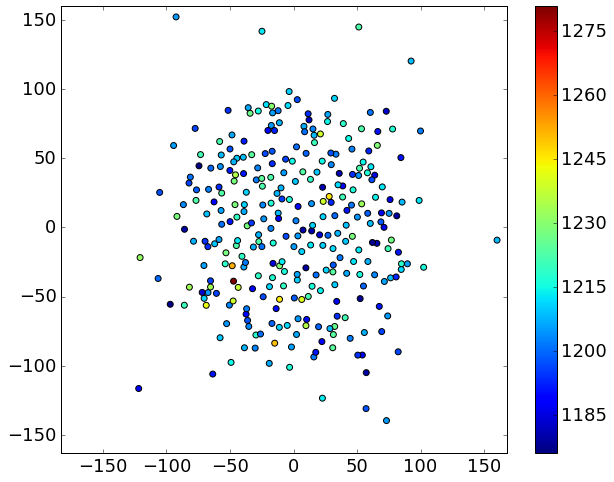

In [23]:
plot_tsne(d['phis'], d['perplexities'], 10, picture_path='check_uniqueness/pictures/plsa.eps')

In [24]:
investigate_matrix_variance(d['phis'], shape=(T, W))

Average pairwise MAE: 0.576717693452
Pairwise MAE std: 0.00133813163909


Average pairwise sMAPE: 1.11876335583
Pairwise sMAPE std: 0.0010777860745


Average pairwise KL: 2.93109199162
Pairwise KL std: 0.0128333115239


Average pairwise KL2: 0.214731904781
Pairwise KL2 std: 0.000664538013233


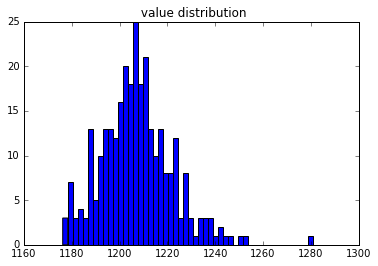

Average pairwise MAE: 16.3906936607
Pairwise MAE std: 13.2121522717


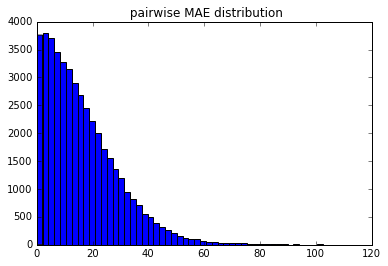

Average pairwise sMAPE: 0.0135569514053
Pairwise sMAPE std: 0.0108618998879


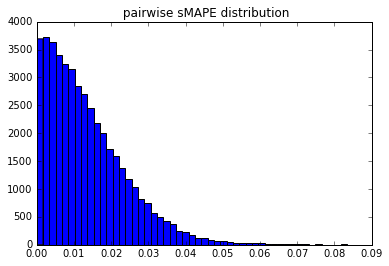

In [25]:
investigate_scalar_variance(d['perplexities'])

In [26]:
with open('check_uniqueness/full_initialized_plsa.pkl', 'r') as f:
    d = pickle.load(f)

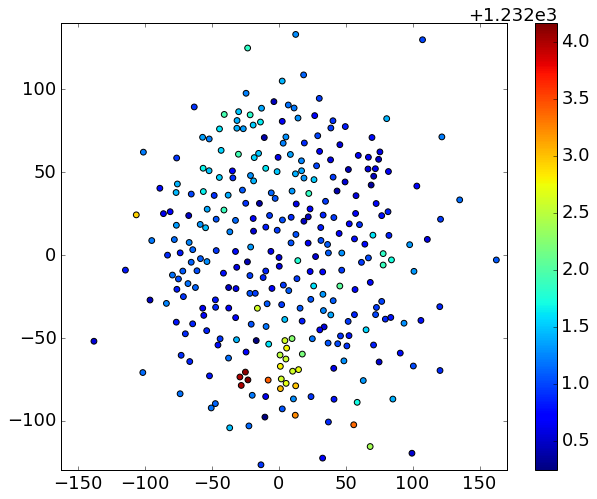

In [27]:
plot_tsne(d['phis'], d['perplexities'], 10, picture_path='check_uniqueness/pictures/full_initialized_plsa.eps')

In [28]:
investigate_matrix_variance(d['phis'], shape=(T, W))

Average pairwise MAE: 0.0529423284919
Pairwise MAE std: 0.000389138844977


Average pairwise sMAPE: 0.119937597348
Pairwise sMAPE std: 0.000545917125514


Average pairwise KL: 0.0189213686081
Pairwise KL std: 0.000363034449669


Average pairwise KL2: 0.00523866077918
Pairwise KL2 std: 7.51012171689e-05


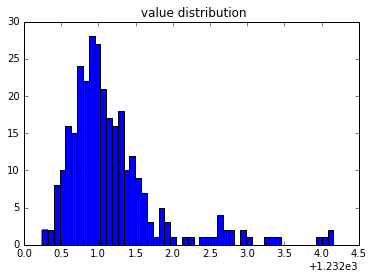

Average pairwise MAE: 0.622174853181
Pairwise MAE std: 0.663822505216


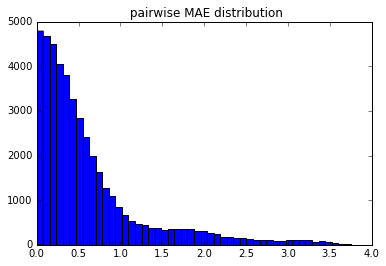

Average pairwise sMAPE: 0.000504389790148
Pairwise sMAPE std: 0.000537871932204


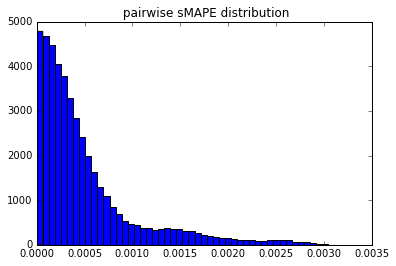

In [29]:
investigate_scalar_variance(d['perplexities'])

In [30]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 0.210652018169
MAE std: 0.0206656067434
Min MAE: 0.00319677145838

Average sMAPE: 0.100480515665
sMAPE std: 0.00584839901001
Min sMAPE: 0.00197303621025

Average greed MAE: 0.0421304036338
greed MAE std: 0.00413312134869

Average greed sMAPE: 0.100527634492
greed sMAPE std: 0.00583062026546

Average greed KL: 0.0163379491022
greed KL std: 0.00427761367357

Average greed KL2: 0.00359865879822
greed KL2 std: 0.000746717074089


In [31]:
with open('check_uniqueness/syntetic_plsa.pkl', 'r') as f:
    d = pickle.load(f)

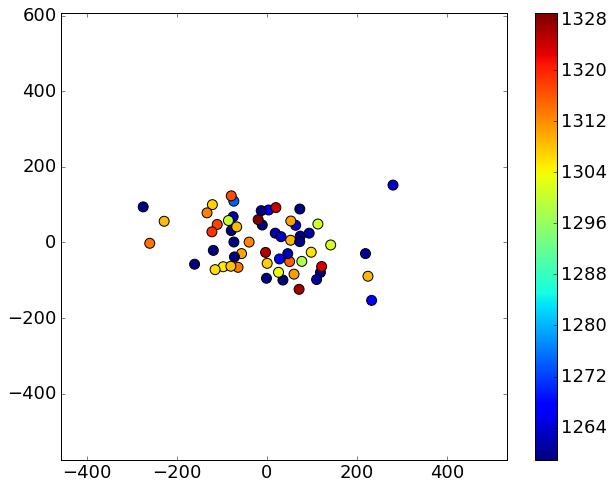

In [32]:
plot_tsne(d['phis'], d['perplexities'], 5, picture_path='check_uniqueness/pictures/syntetic_plsa.eps')

In [33]:
investigate_matrix_variance(d['phis'], shape=(T, W))

Average pairwise MAE: 0.278048528358
Pairwise MAE std: 0.0105736678451


Average pairwise sMAPE: 0.947167802046
Pairwise sMAPE std: 0.00980962983354


Average pairwise KL: 0.24917552862
Pairwise KL std: 0.0135463500296


Average pairwise KL2: 0.0758901093977
Pairwise KL2 std: 0.0035889336882


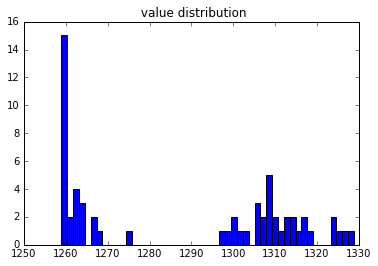

Average pairwise MAE: 28.4895921814
Pairwise MAE std: 22.687267039


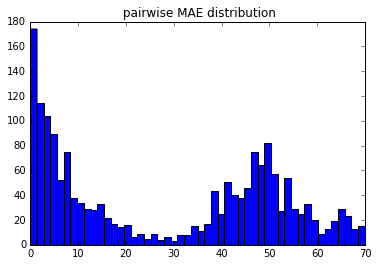

Average pairwise sMAPE: 0.0221068497442
Pairwise sMAPE std: 0.0176217361678


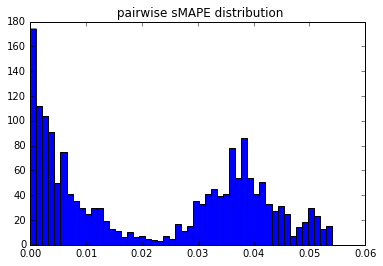

In [34]:
investigate_scalar_variance(d['perplexities'])

In [35]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 5.50168607981
MAE std: 0.530800437962
Min MAE: 0.0393516866716

Average sMAPE: 1.51994937677
sMAPE std: 0.0535421393587
Min sMAPE: 0.941828250178

Average greed MAE: 0.219768492762
greed MAE std: 0.0625445804556

Average greed sMAPE: 1.07009769808
greed sMAPE std: 0.0338579828487

Average greed KL: 0.13438780093
greed KL std: 0.0419348862405

Average greed KL2: 0.0696779223491
greed KL2 std: 0.0214762449106


In [36]:
with open('check_uniqueness/full_initialized_syntetic_plsa.pkl', 'r') as f:
    d = pickle.load(f)

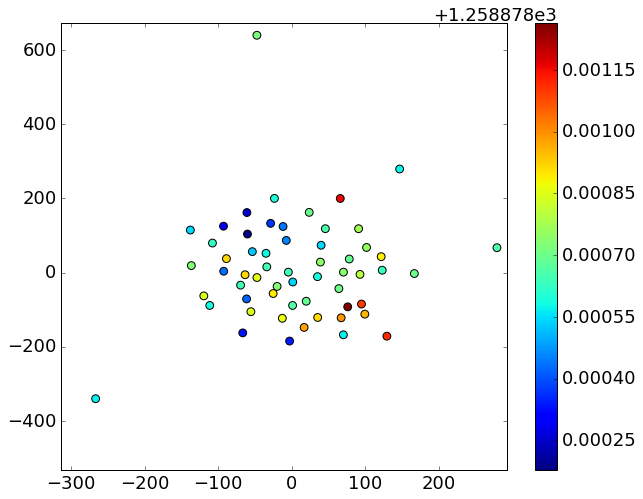

In [37]:
plot_tsne(d['phis'], d['perplexities'], 5, picture_path='check_uniqueness/pictures/full_initialized_syntetic_plsa.eps')

In [38]:
investigate_matrix_variance(d['phis'], shape=(T, W))

Average pairwise MAE: 6.82191400023e-05
Pairwise MAE std: 2.06278119857e-06


Average pairwise sMAPE: 0.00112539218609
Pairwise sMAPE std: 1.62761551759e-05


Average pairwise KL: 8.93349041562e-07
Pairwise KL std: 6.61205214927e-08


Average pairwise KL2: 4.44348820776e-07
Pairwise KL2 std: 3.28058248187e-08


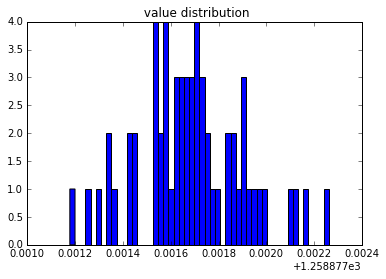

Average pairwise MAE: 0.000250564704114
Pairwise MAE std: 0.000191276764139


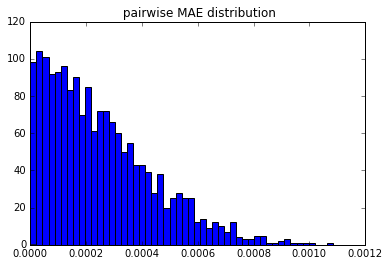

Average pairwise sMAPE: 1.99038004782e-07
Pairwise sMAPE std: 1.51942169431e-07


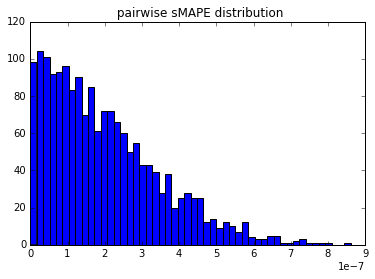

In [39]:
investigate_scalar_variance(d['perplexities'])

In [40]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 0.00384918412613
MAE std: 7.10035794434e-05
Min MAE: 0.00344253125322

Average sMAPE: 0.00775845184469
sMAPE std: 5.50704080014e-05
Min sMAPE: 0.00748671616445

Average greed MAE: 0.000769836825225
greed MAE std: 1.42007158887e-05

Average greed sMAPE: 0.00798646928908
greed sMAPE std: 5.5849493847e-05

Average greed KL: 6.61848936323e-05
greed KL std: 1.76269571748e-06

Average greed KL2: 4.11583989182e-05
greed KL2 std: 1.13938291844e-06
